<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Instruksi-tugas" data-toc-modified-id="Instruksi-tugas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Instruksi tugas</a></span></li><li><span><a href="#Deskripsi-data" data-toc-modified-id="Deskripsi-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Deskripsi data</a></span></li><li><span><a href="#Persiapan" data-toc-modified-id="Persiapan-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Persiapan</a></span></li><li><span><a href="#Analisis" data-toc-modified-id="Analisis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analisis</a></span></li><li><span><a href="#Pelatihan" data-toc-modified-id="Pelatihan-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pelatihan</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Light-GBM" data-toc-modified-id="Light-GBM-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Light GBM</a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Catboost</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#Pengujian" data-toc-modified-id="Pengujian-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pengujian</a></span></li></ul></div>

# Deskripsi tugas

Perusahaan taksi bernama Sweet Lift telah mengumpulkan data historis tentang pesanan taksi di bandara. Untuk menarik lebih banyak pengemudi pada jam sibuk, perlu memprediksi jumlah pesanan taksi untuk satu jam berikutnya. Buat model untuk prediksi seperti itu.

Metrik RMSE pada *test set* tidak boleh lebih dari 48.

## Instruksi tugas

1. Unduh data dan lakukan *resampling* dalam satu jam.
2. Analisis datanya.
3.  Latih model yang berbeda dengan hiperparameter yang berbeda pula. Sampel tes harus 10% dari *dataset* awal.
4. Uji data menggunakan sampel tes dan berikan kesimpulan.

## Deskripsi data

Data tersimpan di file `taxi.csv`. Jumlah pesanan di kolom'*num_orders*'.

## Persiapan

Pertama, kita akan import semua library yang dibutuhkan pada project ini. Diantaranya pandas, matplotlib untuk pembuatan chart, lalu library untuk keperluan pelatihan model, dan fungsi-fungsi lainnya.

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Berikutnya, kita import data yang sudah disediakan, dengan mengubah data pada kolom pertama sebagai index pada dataframe. Data pada kolom pertama ini berisi tanggal transaksi.

In [5]:
taxi = pd.read_csv('datasets/taxi.csv', index_col=[0], parse_dates=[0])
taxi.sort_index(inplace=True)

In [6]:
taxi.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Dibawah ini, data taxi diresample menjadi 1 jam, dengan nilai pada kolom "num_orders" diubah menjadi total dari semua jumlah order pada 1 jam.

In [7]:
taxi_v1 = taxi.resample('1H').sum()

In [8]:
taxi_v1.head(24)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


## Analisis

In [9]:
taxi_v1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [10]:
taxi_v1.isnull().sum()

num_orders    0
dtype: int64

<Axes: xlabel='datetime'>

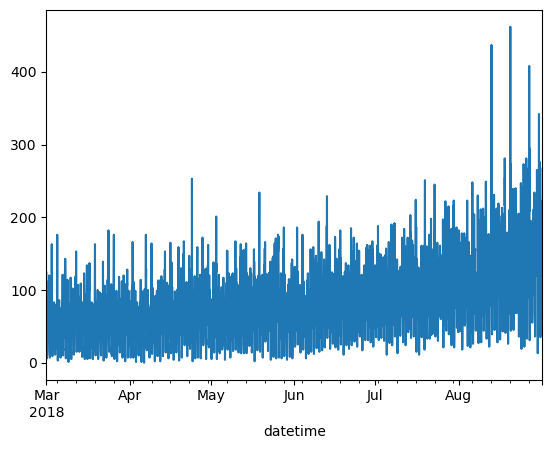

In [11]:
taxi_v1['num_orders'].plot()

In [12]:
taxi_v2 = taxi_v1.copy()
rolling_size = [4, 6, 8]
for rs in rolling_size:
    mean_variable = 'rolling_mean_' + str(rs)        
    std_variable = 'rolling_std_' + str(rs)
    taxi_v2[mean_variable] = taxi_v2['num_orders'].rolling(rs).mean()
    taxi_v2[std_variable] = taxi_v2['num_orders'].rolling(rs).std()

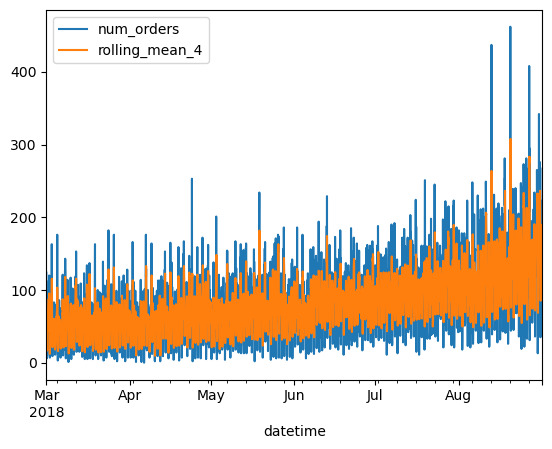

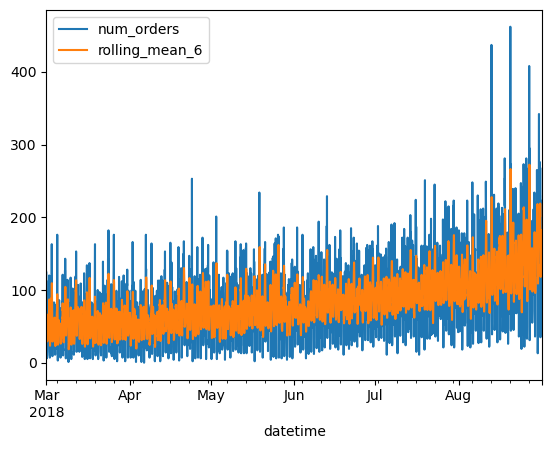

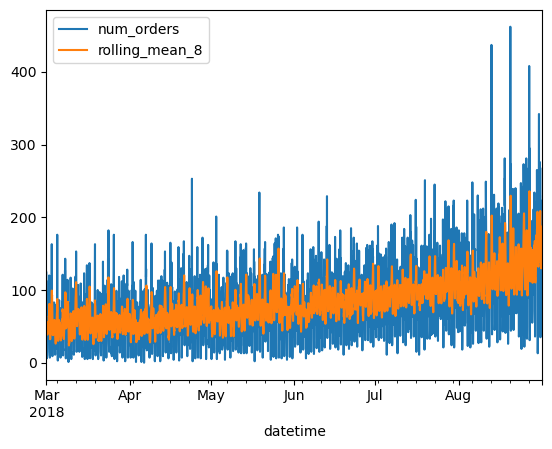

In [13]:
for rs in rolling_size: 
    mean_variable = 'rolling_mean_' + str(rs)
    std_variable = 'rolling_std_' + str(rs)
    taxi_v2.plot(y=['num_orders', mean_variable])
    plt.show()

Dilihat dari jumlah order maupun rata-rata bergerak (moving average) pada 4, 6 dan 8 jam, nilai transaksi terus meningkat secara linear.

<Axes: xlabel='datetime'>

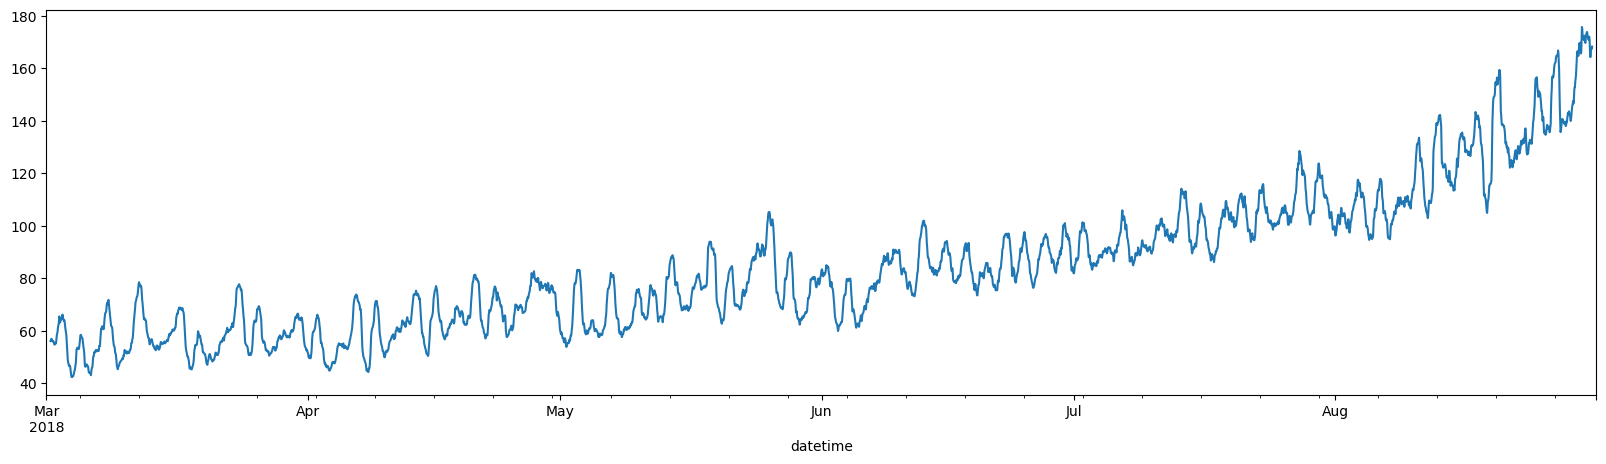

In [14]:
taxi_decomposed = seasonal_decompose(taxi_v1)
taxi_decomposed.trend.plot(figsize=(20,5))

<Axes: xlabel='datetime'>

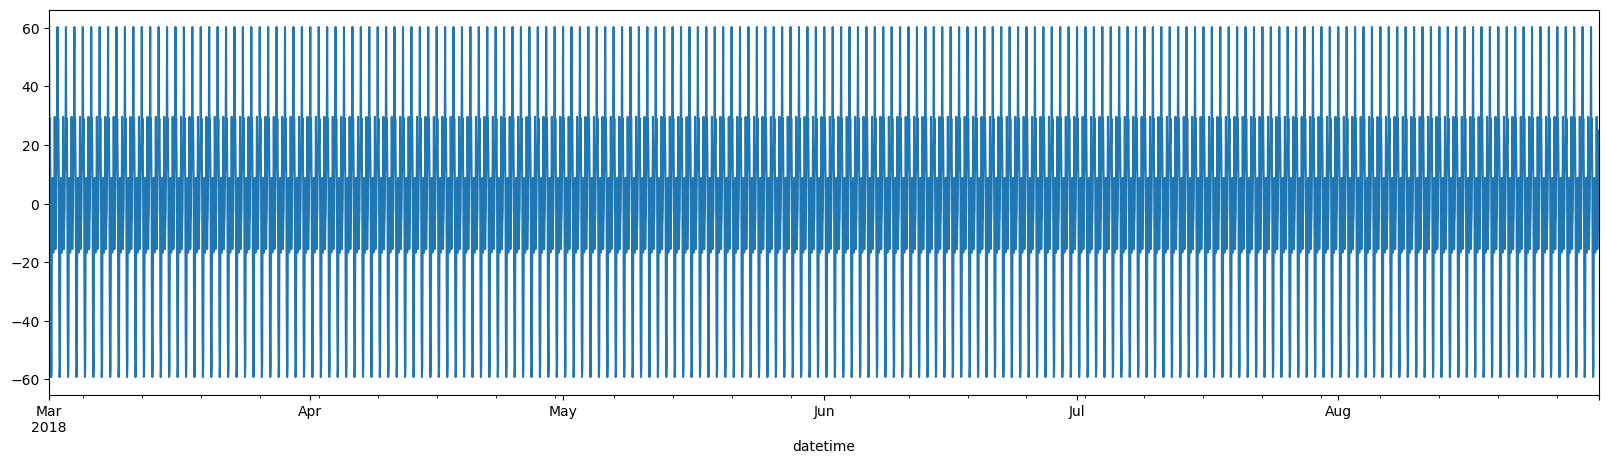

In [15]:
taxi_decomposed.seasonal.plot(figsize=(20,5))

<Axes: xlabel='datetime'>

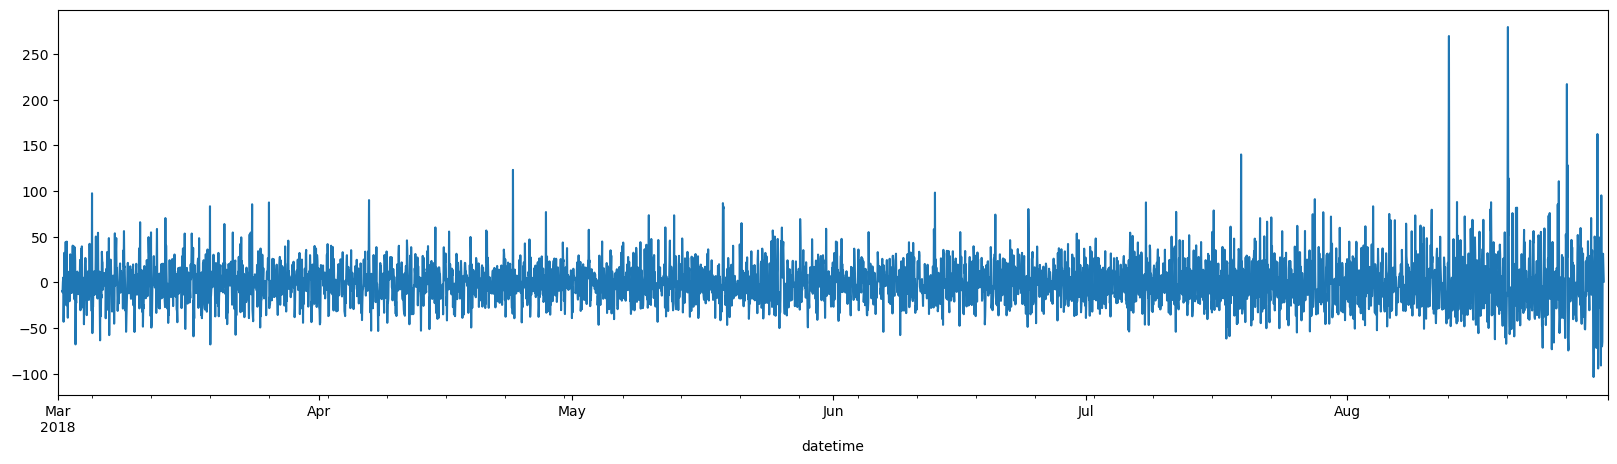

In [16]:
taxi_decomposed.resid.plot(figsize=(20,5))

Setelah menganalisa data pesanan taxi, kita akan membuat fitur yang dapat memprediksi jumlah pesanan taxi di jam berikutnya. Pada tahap ini, kita akan menggunakan data dari rata-rata bergerak, dan jumlah dari 4 jam terakhir, serta data pesanan dari 4 4 jam sebelumnya. 

In [17]:
def make_feature(data, lag, rolling):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    for l in range(1, lag+1, 1):
        column = 'lag_'+ str(l)
        data[column] = data['num_orders'].shift(l)
    
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling).mean()
    data['rolling_sum'] = data['num_orders'].shift().rolling(rolling).sum()
    
    return data

In [18]:
taxi_v2 = make_feature(taxi_v1, 4, 4)
taxi_v2.head()

,num_orders,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,rolling_mean,rolling_sum
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,4,66.0,71.0,85.0,124.0,86.5,346.0


In [19]:
taxi_v2 = taxi_v2.dropna()
taxi_v2.head(30)

,num_orders,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,rolling_mean,rolling_sum
datetime,,,,,,,,,,,,
2018-03-01 04:00:00,43,2018,3,1,3,4,66.0,71.0,85.0,124.0,86.50,346.0
2018-03-01 05:00:00,6,2018,3,1,3,5,43.0,66.0,71.0,85.0,66.25,265.0
2018-03-01 06:00:00,12,2018,3,1,3,6,6.0,43.0,66.0,71.0,46.50,186.0
2018-03-01 07:00:00,15,2018,3,1,3,7,12.0,6.0,43.0,66.0,31.75,127.0
2018-03-01 08:00:00,34,2018,3,1,3,8,15.0,12.0,6.0,43.0,19.00,76.0
2018-03-01 09:00:00,69,2018,3,1,3,9,34.0,15.0,12.0,6.0,16.75,67.0
2018-03-01 10:00:00,64,2018,3,1,3,10,69.0,34.0,15.0,12.0,32.50,130.0
2018-03-01 11:00:00,96,2018,3,1,3,11,64.0,69.0,34.0,15.0,45.50,182.0
2018-03-01 12:00:00,30,2018,3,1,3,12,96.0,64.0,69.0,34.0,65.75,263.0


In [20]:
taxi_v2.corr()

,num_orders,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,rolling_mean,rolling_sum
num_orders,1.000000,NaN,0.510724,0.165613,-0.019631,0.004426,0.624188,0.465559,0.321289,0.248791,0.518818,0.518818
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.510724,NaN,1.000000,0.003218,-0.011978,-0.001919,0.510694,0.510415,0.510187,0.509330,0.637717,0.637717
day,0.165613,NaN,0.003218,1.000000,-0.013848,-0.002200,0.165602,0.165521,0.165036,0.164691,0.206523,0.206523
dayofweek,-0.019631,NaN,-0.011978,-0.013848,1.000000,-0.000004,-0.027334,-0.029569,-0.029058,-0.028695,-0.035831,-0.035831
hour,0.004426,NaN,-0.001919,-0.002200,-0.000004,1.000000,-0.075944,-0.120203,-0.154571,-0.146248,-0.155285,-0.155285
lag_1,0.624188,NaN,0.510694,0.165602,-0.027334,-0.075944,1.000000,0.623505,0.465064,0.320580,0.753074,0.753074
lag_2,0.465559,NaN,0.510415,0.165521,-0.029569,-0.120203,0.623505,1.000000,0.623204,0.464503,0.847302,0.847302
lag_3,0.321289,NaN,0.510187,0.165036,-0.029058,-0.154571,0.465064,0.623204,1.000000,0.622932,0.847185,0.847185
lag_4,0.248791,NaN,0.509330,0.164691,-0.028695,-0.146248,0.320580,0.464503,0.622932,1.000000,0.752372,0.752372


## Pelatihan

Kita memiliki 11 fitur yang dapat digunakan untuk memprediksi jumlah pemesanan taxi di jam berikutnya. Fitur ini dapat kita gunakan untuk melakukan pelatihan model. Sebelumnya, kita perlu membagi data menjadi 2 bagian, yaitu 90% data train, dan 10% data test. Dengan catatan bahwa data yang dipisah adalah berurutan, karena kita akan memprediksi data di waktu mendatang. Jika data tidak dipisah dengan berurutan, maka akan mempengaruhi hasil pelatihan. Dan untuk membagi data train dan test secara berurutan, kita menggunakan parameter shuffle=False pada saat menggunakan function train_test_split.

In [21]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

In [22]:
feature = taxi_v2.drop(['num_orders'], axis=1)
target = taxi_v2['num_orders']

X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle=False, test_size=0.1)

In [23]:
X_train.head()

,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,rolling_mean,rolling_sum
datetime,,,,,,,,,,,
2018-03-01 04:00:00,2018,3,1,3,4,66.0,71.0,85.0,124.0,86.50,346.0
2018-03-01 05:00:00,2018,3,1,3,5,43.0,66.0,71.0,85.0,66.25,265.0
2018-03-01 06:00:00,2018,3,1,3,6,6.0,43.0,66.0,71.0,46.50,186.0
2018-03-01 07:00:00,2018,3,1,3,7,12.0,6.0,43.0,66.0,31.75,127.0
2018-03-01 08:00:00,2018,3,1,3,8,15.0,12.0,6.0,43.0,19.00,76.0


In [24]:
X_test.head()

,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,rolling_mean,rolling_sum
datetime,,,,,,,,,,,
2018-08-13 14:00:00,2018,8,13,0,14,119.0,92.0,144.0,156.0,127.75,511.0
2018-08-13 15:00:00,2018,8,13,0,15,102.0,119.0,92.0,144.0,114.25,457.0
2018-08-13 16:00:00,2018,8,13,0,16,175.0,102.0,119.0,92.0,122.00,488.0
2018-08-13 17:00:00,2018,8,13,0,17,144.0,175.0,102.0,119.0,135.00,540.0
2018-08-13 18:00:00,2018,8,13,0,18,152.0,144.0,175.0,102.0,143.25,573.0


Kita sudah memiliki data train dan test, termasuk fitur dan targetnya. Sekarang kita akan melakukan pelatihan model dengan 6 model algoritma yaitu 
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Light GBM
- Catboost
- XGBoost

3 model terakhir merupakan model ensemble yaitu gradient boosting.

### Linear Regression

In [25]:
%%time
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_train)

print(rmse(y_train, lr_pred))

30.500374252442196
CPU times: total: 15.6 ms
Wall time: 14 ms


### Decision Tree

In [26]:
%%time
dt = None
dt_score = 99999
dt_hyperparam = None
for depth in range(1,11):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    result = rmse(y_train, predictions)
    if result < dt_score:
        dt = model
        dt_score = result
        dt_hyperparam = {
            "depth": depth
        }
        #print(f'depth: {depth}, RMSE: {result}')        

print(f'Best depth: {dt_hyperparam["depth"]}, score: {dt_score}')

Best depth: 10, score: 16.265604601935614
CPU times: total: 172 ms
Wall time: 397 ms


### Random Forest

In [27]:
%%time
rf = None
rf_hyperparam = None
rf_score = 99999
for est in range (10,101,10):
    for depth in range(1,11):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth, bootstrap=True)
        model.fit(X_train, y_train)
        predictions_valid = model.predict(X_train)
        result = (rmse(y_train, predictions_valid))
        if(result < rf_score):
            rf_score = result
            rf_hyperparam = {
                "est": est,
                "depth": depth
            }            
            rf = model
        #print(f'RMSE: {result}, est: {est}, max depth: {depth}')

print(f'{rf_hyperparam}, score: {rf_score}')     

{'est': 100, 'depth': 10}, score: 15.33629885185717
CPU times: total: 1min 12s
Wall time: 1min 56s


### Light GBM

In [28]:
%%time
lgbm = None
lgbm_hyperparam = None
lgbm_score = 99999
for est in range (10,51,10):
    for depth in range(1,11):
        for alpha in range(1,11):
            model = LGBMRegressor(random_state=12345, n_estimators=est, max_depth=depth, reg_alpha=alpha)
            model.fit(X_train, y_train)
            predictions_valid = model.predict(X_train)
            result = (rmse(y_train, predictions_valid))
            if(result < lgbm_score):
                lgbm_score = result
                lgbm_hyperparam = {
                    "est": est,
                    "depth": depth,
                    "alpha": alpha
                }            
                lgbm = model
            #print(f'RMSE: {result}, est: {est}, max depth: {depth}, alpha: {alpha}')

print(f'{lgbm_hyperparam}, score: {lgbm_score}') 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start trai

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start trai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leav

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start trai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Star

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start trai

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't expli

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start trai

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set n

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 10
[LightGBM] [Info] Start training from score 78.282368
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
{'est': 50, 'depth': 9, 'alpha': 2}, score: 17.77926922062331
CPU times: total: 15 s
Wall time: 28.9 s


### Catboost

In [29]:
%%time
cb = None
cb_hyperparam = None
cb_score = 99999
for depth in range(1,11):
    model = CatBoostRegressor(random_state=12345, iterations=150, depth=depth, loss_function='RMSE', verbose=100)
    model.fit(X_train, y_train)
    predictions_valid = model.predict(X_train)
    result = (rmse(y_train, predictions_valid))
    if(result < cb_score):
        cb_score = result
        cb_hyperparam = {
            "depth": depth,
        }            
        cb = model

print(f'{cb_hyperparam}, score: {cb_score}') 

Learning rate set to 0.238027
0:	learn: 36.9608314	total: 140ms	remaining: 20.9s
100:	learn: 24.9782483	total: 255ms	remaining: 124ms
149:	learn: 24.4538267	total: 312ms	remaining: 0us
Learning rate set to 0.238027
0:	learn: 36.3461700	total: 2.53ms	remaining: 377ms
100:	learn: 21.9244172	total: 169ms	remaining: 82ms
149:	learn: 21.0800836	total: 278ms	remaining: 0us
Learning rate set to 0.238027
0:	learn: 35.7738119	total: 3.33ms	remaining: 496ms
100:	learn: 20.3007968	total: 257ms	remaining: 125ms
149:	learn: 19.2099172	total: 373ms	remaining: 0us
Learning rate set to 0.238027
0:	learn: 34.6751215	total: 3.6ms	remaining: 536ms
100:	learn: 19.0422097	total: 274ms	remaining: 133ms
149:	learn: 17.8804121	total: 404ms	remaining: 0us
Learning rate set to 0.238027
0:	learn: 34.6171477	total: 3.36ms	remaining: 500ms
100:	learn: 17.9962797	total: 324ms	remaining: 157ms
149:	learn: 16.4711772	total: 496ms	remaining: 0us
Learning rate set to 0.238027
0:	learn: 34.3045997	total: 16.5ms	remainin

### XGBoost

In [30]:
%%time
xgb = None
xgb_hyperparam = None
xgb_score = 99999

for depth in range(1,11):
    model = XGBRegressor(random_state=12345, n_estimators=150, max_depth=depth, alpha=10)
    model.fit(X_train, y_train)
    predictions_valid = model.predict(X_train)
    result = (rmse(y_train, predictions_valid))
    if(result < xgb_score):
        xgb_score = result
        xgb_hyperparam = {
            "est": est,
            "depth": depth
        }            
        xgb = model
        #print(f'RMSE: {result}, est: {est}, max depth: {depth}')

print(f'{xgb_hyperparam}, score: {xgb_score}')

{'est': 50, 'depth': 10}, score: 0.7840359844024155
CPU times: total: 1.69 s
Wall time: 5.55 s


Dari hasil pelatihan, model Linear Regression memiliki hasil paling tinggi dibanding 5 model lainnya dengan nilai RMSE 30. Dan XGBoost memiliki hasil RMSE paling bagus mendekati 0. Sedangkan 4 model lainnya RMSE berada diangka 8-17. Jika dilihat, seharusnya XGBoost merupakan model paling bagus untuk digunakan pada proses pengujian, tetapi kali ini kita akan menguji semua model dengan data test untuk memastikan model mana yang paling sesuai. Tugas kita kali ini harus mendapatkan nilai RMSE dibawah 48 pada data test.

## Pengujian

In [31]:
def create_graph(feature, target, pred, title):
    plt.figure(figsize=(20,5))    
    plt.plot(feature.index, target)
    plt.plot(feature.index, pred, color='red', alpha=0.5)
    plt.title(title)
    plt.show()

52.57450685373697


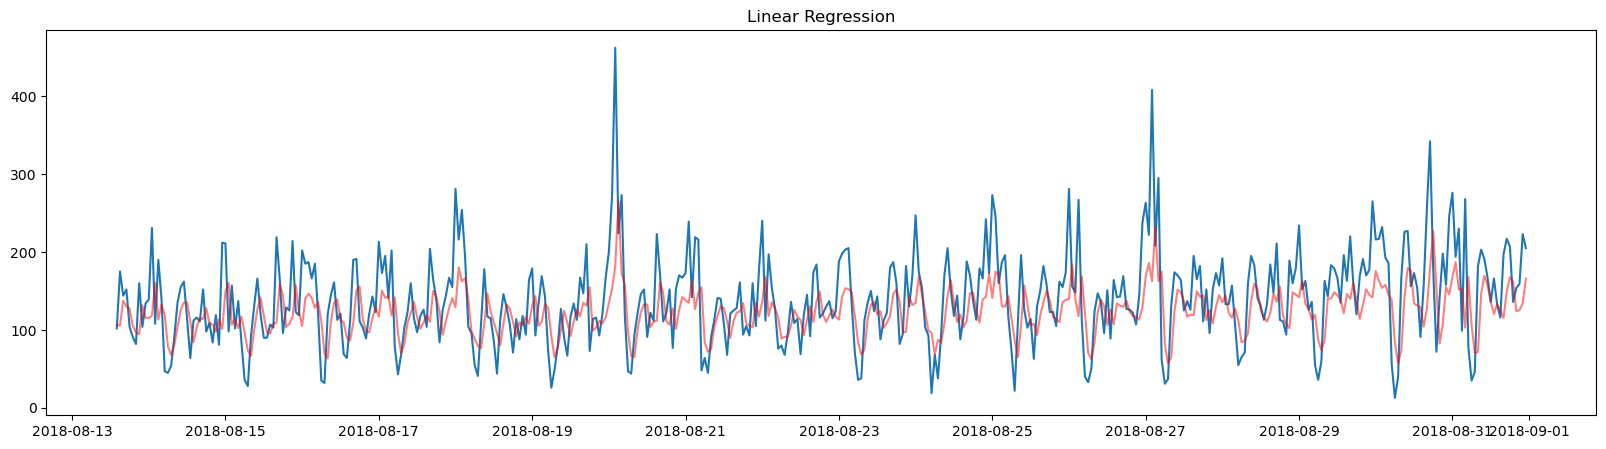

In [32]:
lr_pred = lr.predict(X_test)
print(rmse(y_test, lr_pred))
create_graph(X_test, y_test, lr_pred, 'Linear Regression')

52.01824798308124


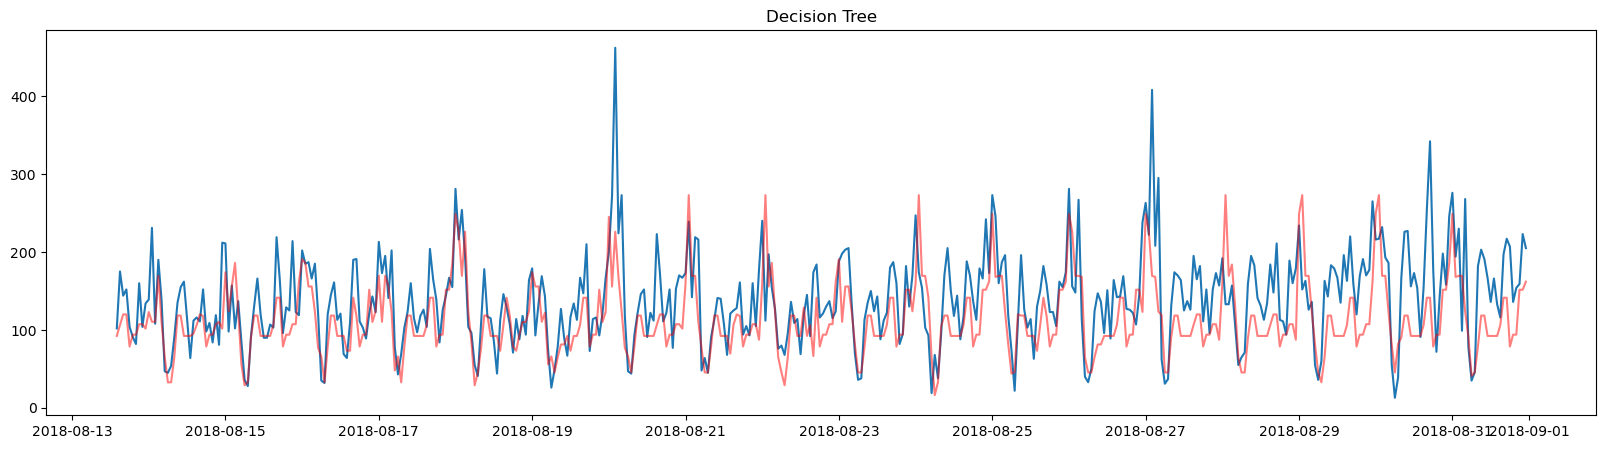

In [33]:
dt_pred = dt.predict(X_test)
print(rmse(y_test, dt_pred))
create_graph(X_test, y_test, dt_pred, 'Decision Tree')

47.98625740902481


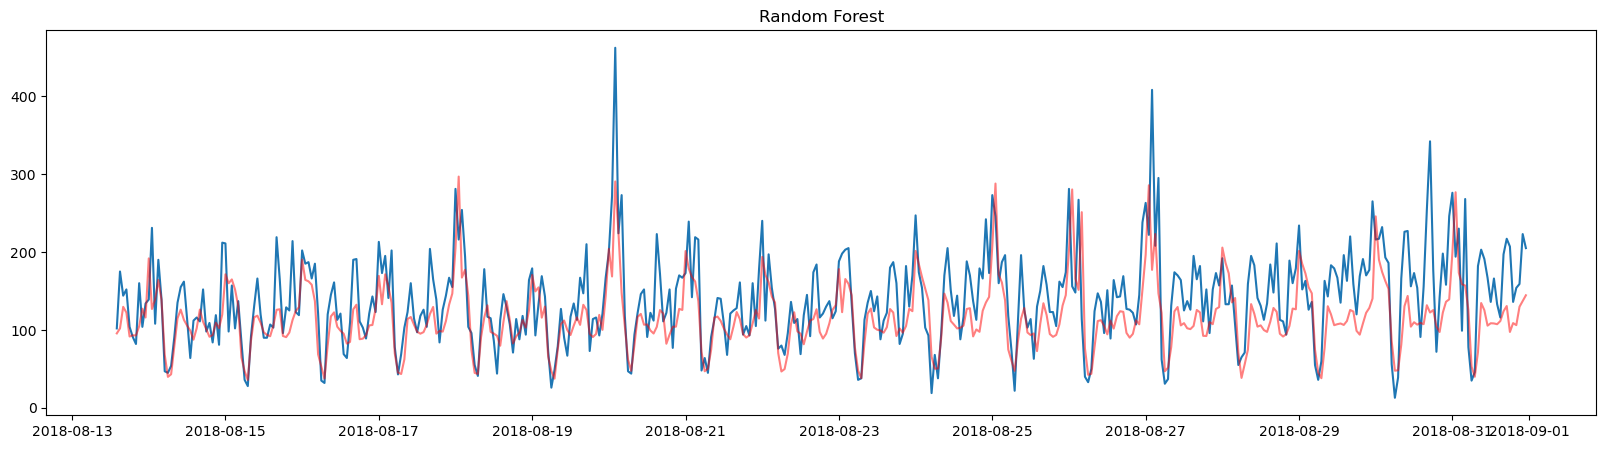

In [34]:
rf_pred = rf.predict(X_test)
print(rmse(y_test, rf_pred))
create_graph(X_test, y_test, rf_pred, 'Random Forest')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
44.64410517728453


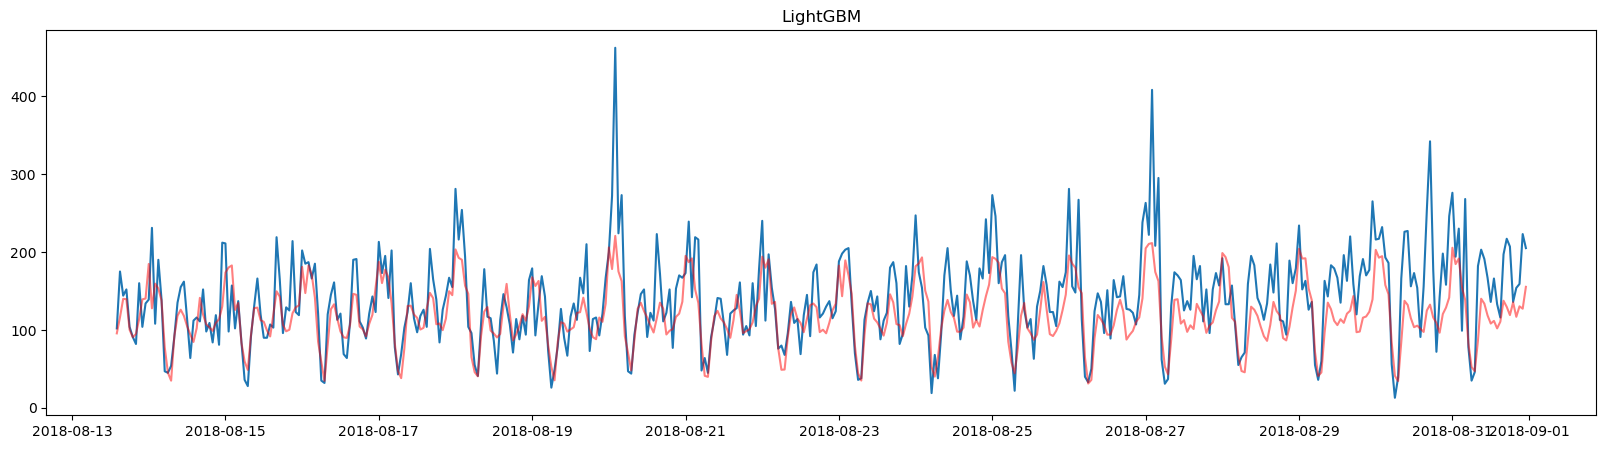

In [35]:
lgbm_pred = lgbm.predict(X_test)
print(rmse(y_test, lgbm_pred))
create_graph(X_test, y_test, lgbm_pred, 'LightGBM')

48.01938949713264


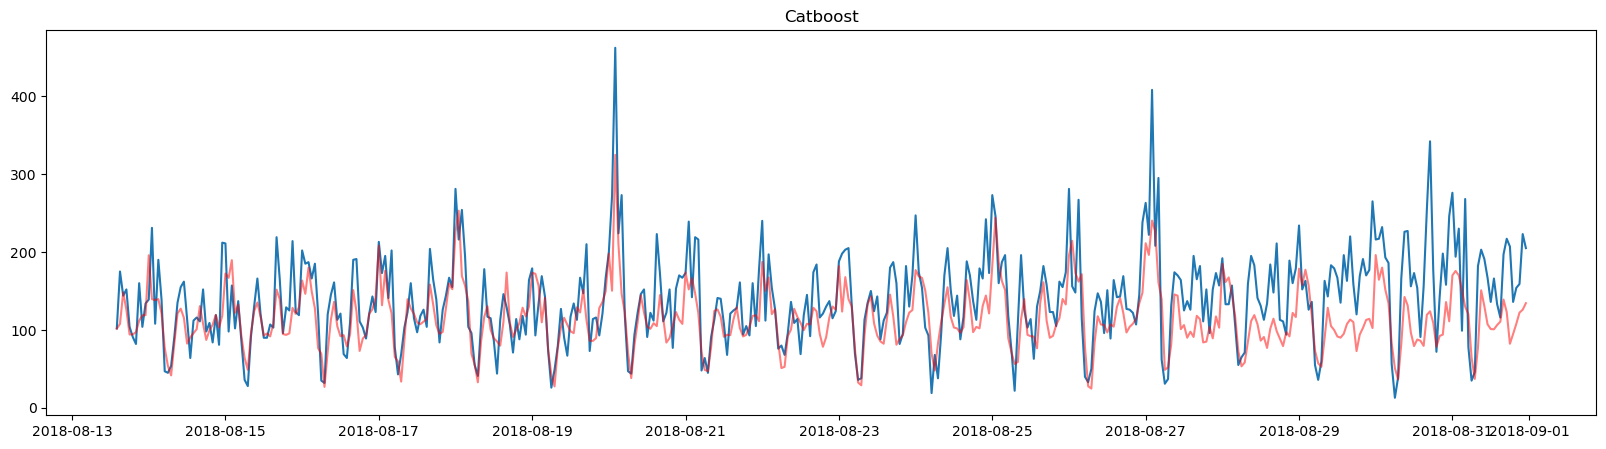

In [36]:
cb_pred = cb.predict(X_test)
print(rmse(y_test, cb_pred))
create_graph(X_test, y_test, cb_pred, 'Catboost')

52.49937147088964


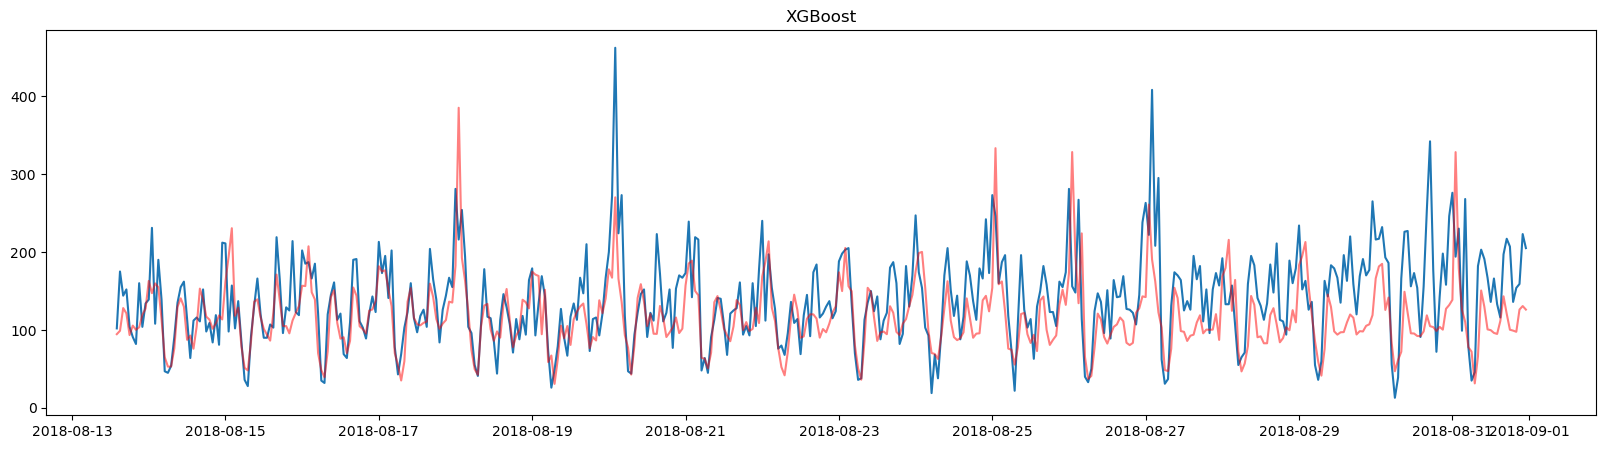

In [37]:
xgb_pred = xgb.predict(X_test)
print(rmse(y_test, xgb_pred))
create_graph(X_test, y_test, xgb_pred, 'XGBoost')

Hasil pengujian menunjukan model Light GBM memiliki nilai RMSE paling rendah dibanding model lain yaitu 44, dan ini sudah memenuhi syarat dari project kali ini, dimana nilai RMSE maksimal di 48. Jika kita membandingkan dengan nilai pada saat pelatihan, seharusnya model XGBoost memberikan nilai terbaik, tetapi setelah pengujian, XGBoost tidak menghasilkan nilai RMSE yang lebih baik dibanding Light GBM. Dari hasil chart yang dibuat, baik model Linear Regression ataupun model lainnya tidak menunjukan perbedaan signifikan, yang mana meski RMSE dari model lain diatas 48 (nilai yang dibutuhkan untuk test set), tetapi secara kualitas masih dapat diterima. Model lainnya dengan nilai RMSE dibawah 48 hanya model Random Forest.